In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install pmdarima

In [4]:
from google.colab import files

In [5]:
uploaded = files.upload()

Saving RestaurantVisitors.csv to RestaurantVisitors (2).csv


In [6]:
df = pd.read_csv('/content/RestaurantVisitors.csv', index_col = 'date', parse_dates=True)

In [7]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [8]:
df.index.freq = 'D'

In [9]:
df.shape

(517, 8)

In [10]:
df.isnull().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [11]:
df1 = df.dropna()

In [12]:
df1.dtypes

weekday          object
holiday           int64
holiday_name     object
rest1           float64
rest2           float64
rest3           float64
rest4           float64
total           float64
dtype: object

In [13]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [14]:
cols = ['rest1', 'rest2', 'rest3', 'rest4', 'total']

In [15]:
for col in cols:
  df1[col] = df1[col].astype(int)

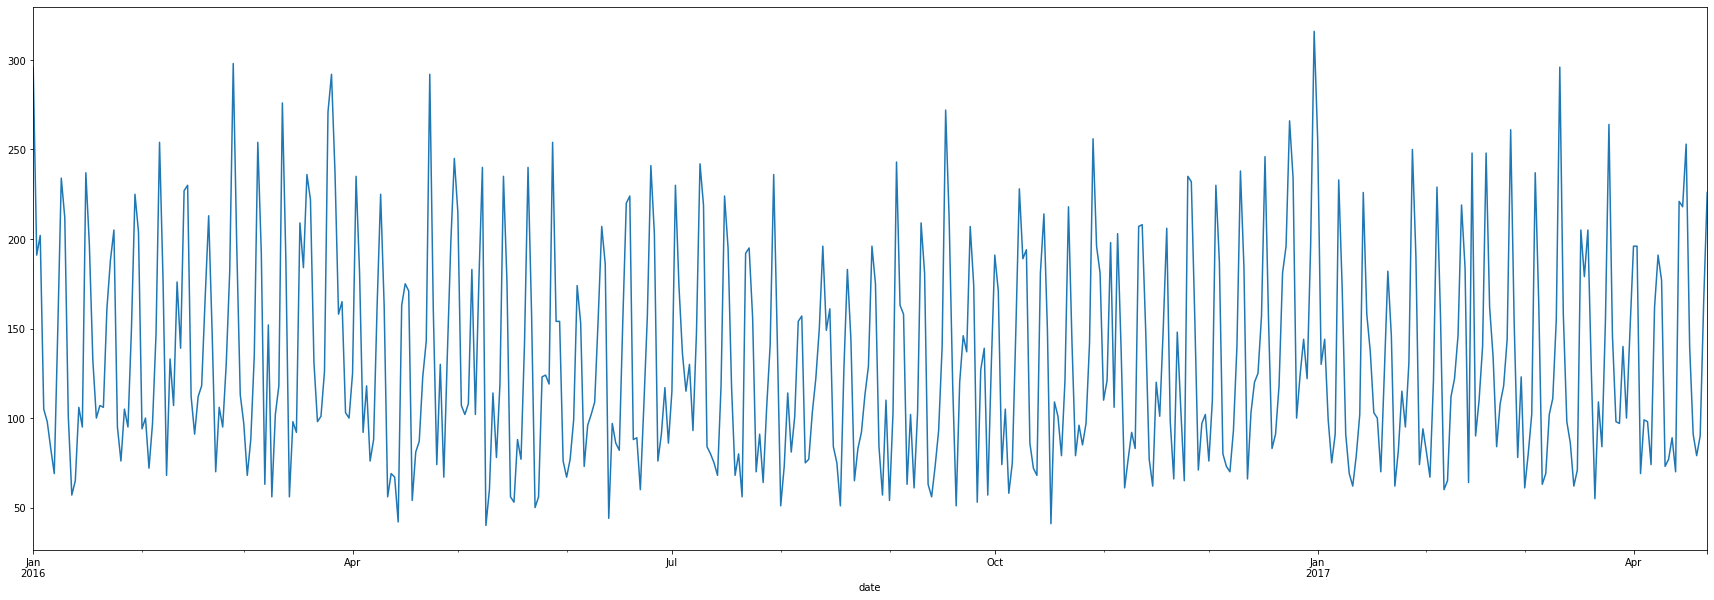

In [16]:
df1['total'].plot(figsize=(30,10))

In [17]:
df1[df1['holiday'] == 1].index # Displays the holiday dates which reported with 1 as their response

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

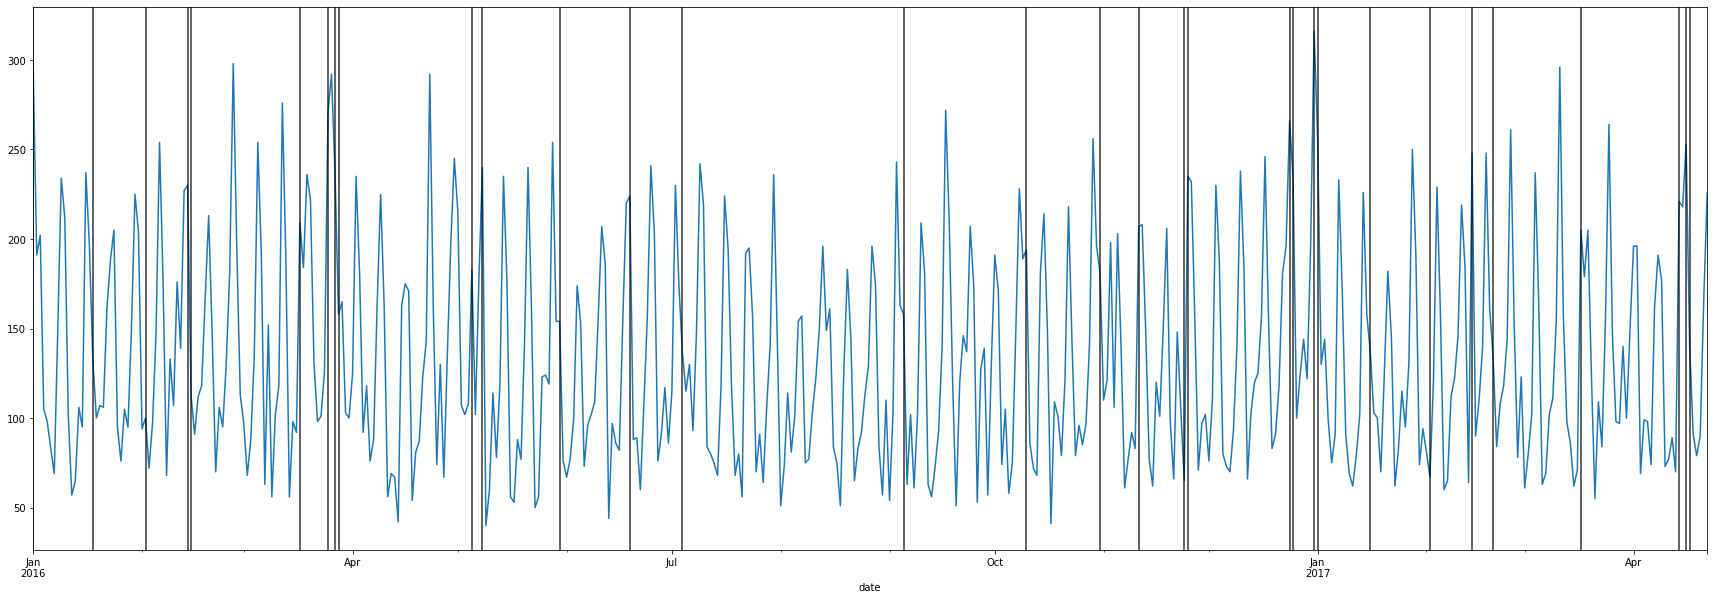

In [18]:
ax = df1['total'].plot(figsize=(30,10))

for day in df1[df1['holiday']==1].index: # Creates a vertical black line where there is a reported special holiday
  ax.axvline(x=day, color='black',alpha=0.8);

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

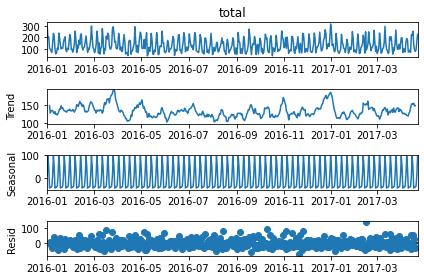

In [20]:
result = seasonal_decompose(df1['total'])
result.plot();

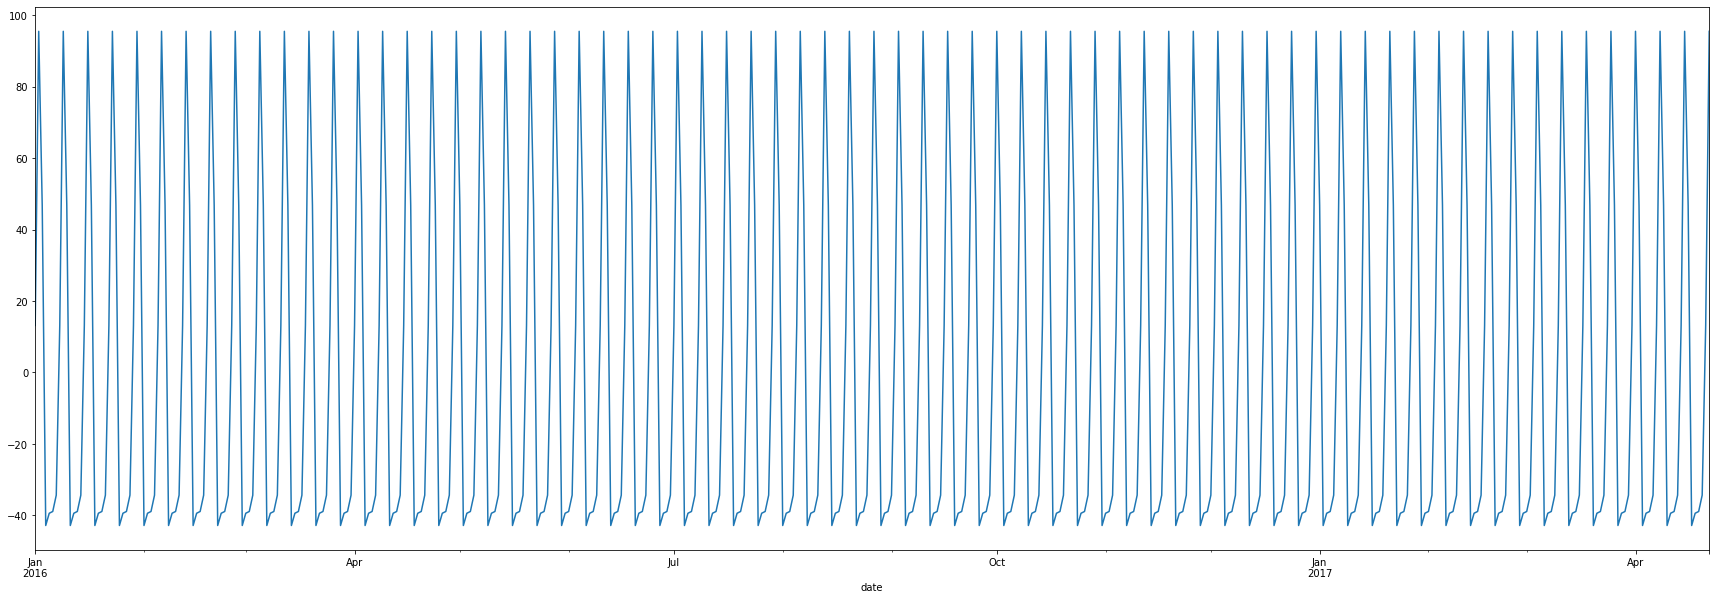

In [21]:
result.seasonal.plot(figsize=(30,10));

In [22]:
len(df1)

478

In [23]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [24]:
from pmdarima import auto_arima

In [25]:
auto_arima(df1['total'], seasonal = True, m = 7).summary() # Considering as the seasonality is weekly we provided m = 7

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2387.926
Date:                   Thu, 08 Oct 2020   AIC                           4783.852
Time:                           03:02:06   BIC                           4800.531
Sample:                                0   HQIC                          4790.409
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.0699      2.102      2.887      0.004       1.949      10.191
ar.S.L7        0.9534      0.016     60.039      0.000       0.922       0.985
ma.S.L7       -0.7315      0.056    -13.101      0.000      -0.841      -0.622
sigma2      1357.6408     88.981     15.258      0.000    1183.242    1532.040
===================================================================================
Ljung-Box (Q):                       73.59   Jarque-Bera (JB):                58.71
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.73
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [27]:
# If we get any valueerror: non-invertible starting MA parameters found, then we need to add enforce_invertibility=False.
model = SARIMAX(train['total'], order = (1,0,1), seasonal_order=(2,0,0,7),enforce_invertibility=False) # enforce_invertibility=False because we dont want to transform the MA parameters to enforce invertibility in the moving average component of the model. If invertiblity is True this will increase the weights depending on the data considered.

In [28]:
results = model.fit()

In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              total   No. Observations:                  436
Model:             SARIMAX(1, 0, 1)x(2, 0, [], 7)   Log Likelihood               -2220.130
Date:                            Thu, 08 Oct 2020   AIC                           4450.259
Time:                                    03:32:34   BIC                           4470.647
Sample:                                01-01-2016   HQIC                          4458.305
                                     - 03-11-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7602      0.092      8.279      0.000       0.580       0.940
ma.L1         -0.5629      0.111     -5.053      0.000      -0.781      -0.345
ar.S.L7        0.4895      0.037     13.067      0.000       0.416       0.563
ar.S.L14       0.4548      0.038     12.064      0.000       0.381       0.529
sigma2      1498.1426     82.127     18.242      0.000    1337.177    1659.109
===================================================================================
Ljung-Box (Q):                       79.97   Jarque-Bera (JB):                27.02
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.34
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
start = len(train)
end = len(train)+len(test)-1

In [32]:
predictions = results.predict(start = start, end = end).rename('SARIMA Model')

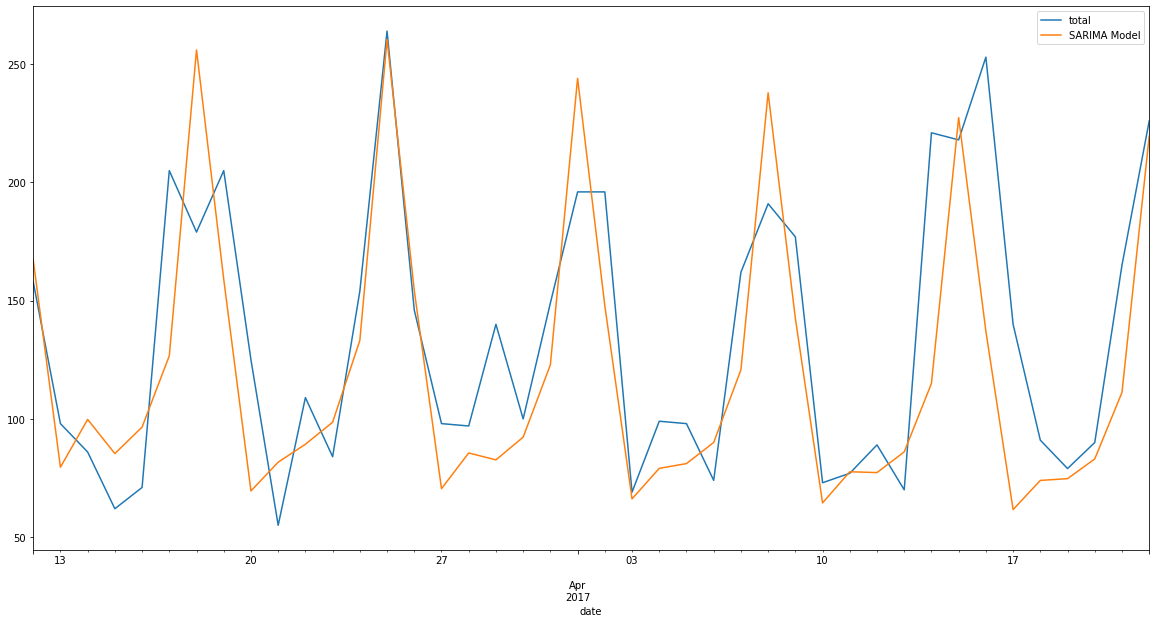

In [33]:
test['total'].plot(legend=True,figsize=(20,10))
predictions.plot(legend=True)

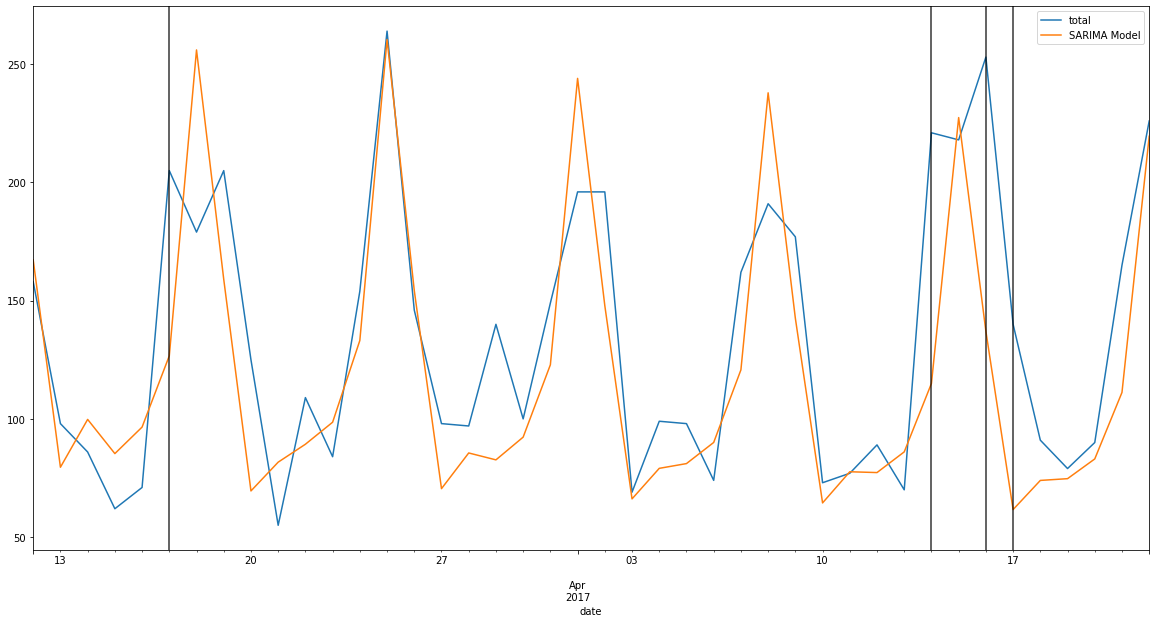

In [34]:
ax = test['total'].plot(legend=True,figsize=(20,10))
predictions.plot(legend=True)

for day in test[test['holiday']==1].index: # Creates a vertical black line where there is a reported special holiday in the test Vs predictions data plot
  ax.axvline(x=day, color='black',alpha=0.8);

In [35]:
from statsmodels.tools.eval_measures import rmse

In [36]:
rmse(test['total'], predictions)

41.15589462409343

In [37]:
test['total'].mean()

134.26190476190476

# Adding Exogenous Variable to the data & Processing

* While implementing a data column in an exogenous variable, we need to place the column_name in double square braces in order to get the output in dataframe.

In [39]:
df1['holiday'] # For Non-Exogenous Variables

date
2016-01-01    1
2016-01-02    0
2016-01-03    0
2016-01-04    0
2016-01-05    0
             ..
2017-04-18    0
2017-04-19    0
2017-04-20    0
2017-04-21    0
2017-04-22    0
Freq: D, Name: holiday, Length: 478, dtype: int64

In [40]:
df1[['holiday']] # For Exogenous Variables

,holiday
date,
2016-01-01,1
2016-01-02,0
2016-01-03,0
2016-01-04,0
2016-01-05,0
...,...
2017-04-18,0
2017-04-19,0
2017-04-20,0


In [41]:
auto_arima(df1['total'], exogenous=df1[['holiday']], seasonal=True, m=7).summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2352.074
Date:                             Thu, 08 Oct 2020   AIC                           4716.148
Time:                                     09:38:24   BIC                           4741.166
Sample:                                 01-01-2016   HQIC                          4725.984
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.0543      2.850      5.634      0.000      10.469      21.639
holiday       45.9411      4.303     10.676      0.000      37.507      54.375
ar.L1          0.0462      0.046      1.004      0.316      -0.044       0.136
ar.S.L7        0.8725      0.022     40.019      0.000       0.830       0.915
ma.S.L7       -0.4876      0.059     -8.335      0.000      -0.602      -0.373
sigma2      1037.9156     70.910     14.637      0.000     898.934    1176.897
===================================================================================
Ljung-Box (Q):                      115.75   Jarque-Bera (JB):                 8.07
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               0.89   Skew:                             0.31
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Training SARIMAX MODEL

In [42]:
model = SARIMAX(train['total'], exog=train[['holiday']], order=(1, 0, 0), seasonal_order=(1, 0, 1, 7), enforce_invertibility=False)

In [43]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2089.208
Date:                             Thu, 08 Oct 2020   AIC                           4188.417
Time:                                     09:50:43   BIC                           4208.805
Sample:                                 01-01-2016   HQIC                          4196.463
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.9347      3.773     18.271      0.000      61.540      76.329
ar.L1          0.2101      0.044      4.763      0.000       0.124       0.297
ar.S.L7        1.0000   5.78e-05   1.73e+04      0.000       1.000       1.000
ma.S.L7       -0.9581      0.022    -43.532      0.000      -1.001      -0.915
sigma2       779.3165     44.867     17.370      0.000     691.379     867.254
===================================================================================
Ljung-Box (Q):                       36.17   Jarque-Bera (JB):                20.47
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.22
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
start = len(train)
end = len(test)+len(train)-1

In [45]:
predictions = result.predict(start, end, exog=test[['holiday']]).rename('SARIMAX with exogenous')

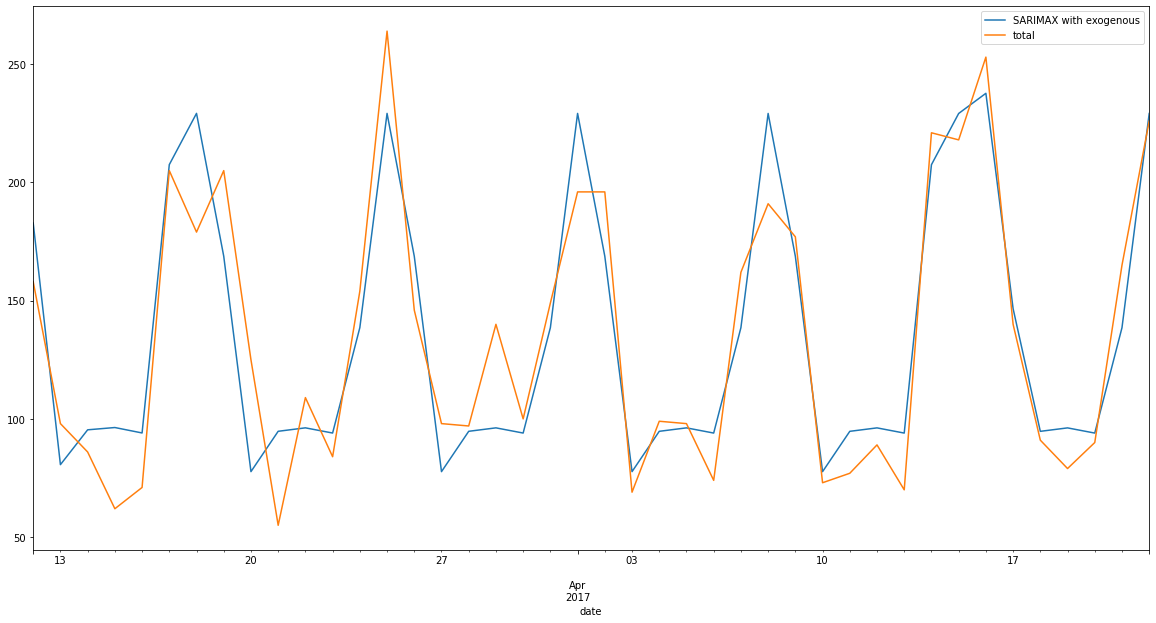

In [46]:
predictions.plot(figsize=(20,10), legend = True)
test['total'].plot(legend=True)

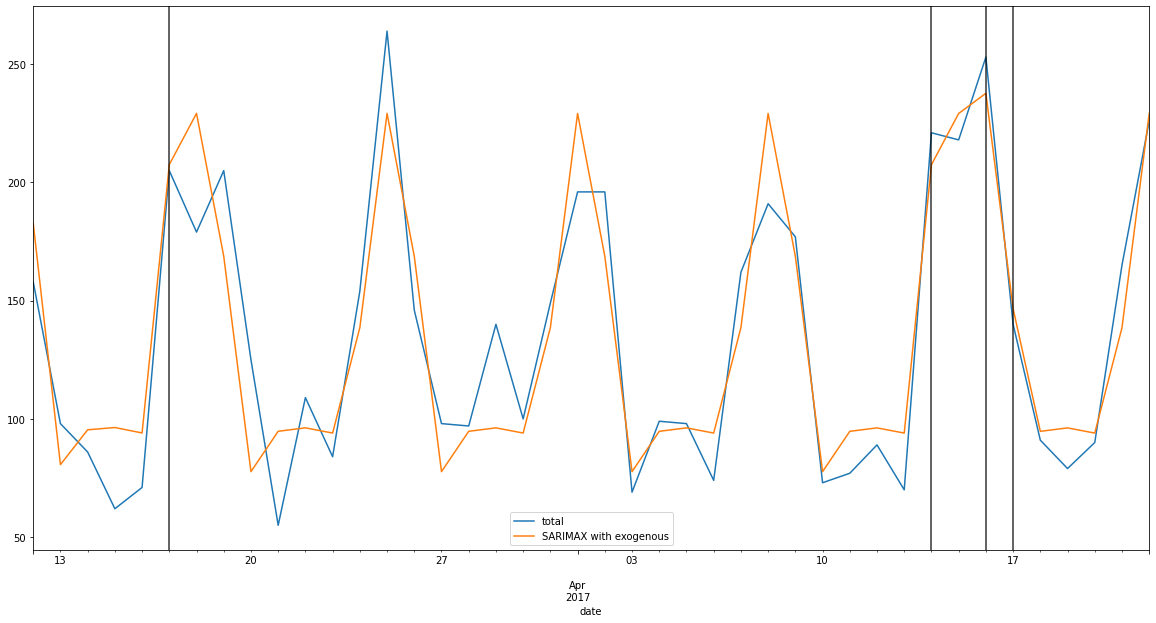

In [48]:
ax = test['total'].plot(legend=True,figsize=(20,10))
predictions.plot(legend=True)

for day in test[test['holiday']==1].index: # Creates a vertical black line where there is a reported special holiday in the test Vs predictions data plot
  ax.axvline(x=day, color='black',alpha=0.8);

In [49]:
rmse(test['total'], predictions)

22.929760570128547

In [50]:
model = SARIMAX(df1['total'], exog = df1[['holiday']], order=(1, 0, 0), seasonal_order=(1, 0, 1, 7), enforce_invertibility=False)

In [51]:
results = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [52]:
df[477:] # The prediction start from 478th variable because we have data till 477.

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0
2017-04-23,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-24,Monday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-25,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-26,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-27,Thursday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-28,Friday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-29,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-30,Sunday,0,na,NaN,NaN,NaN,NaN,NaN


In [53]:
exog_forecast = df[478:][['holiday']]
exog_forecast

,holiday
date,
2017-04-23,0
2017-04-24,0
2017-04-25,0
2017-04-26,0
2017-04-27,0
2017-04-28,0
2017-04-29,0
2017-04-30,0
2017-05-01,0


In [54]:
fcast = results.predict(len(df1), len(df1)+38, exog=exog_forecast).rename('Final SARIMAX Forecast')

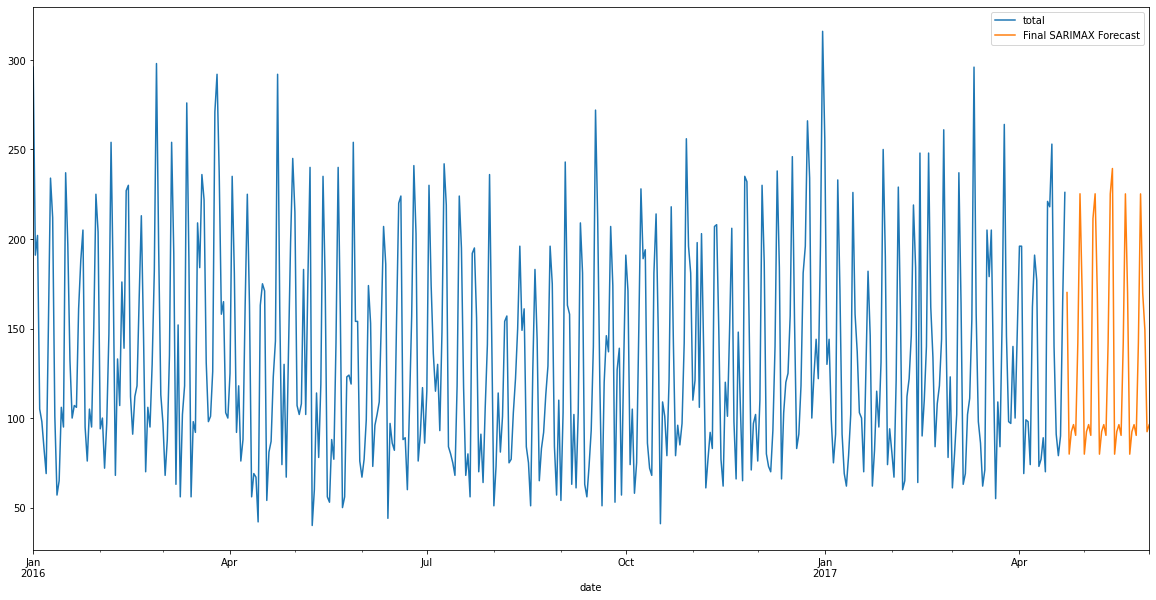

In [55]:
df1['total'].plot(figsize=(20,10), legend=True)
fcast.plot(legend=True)

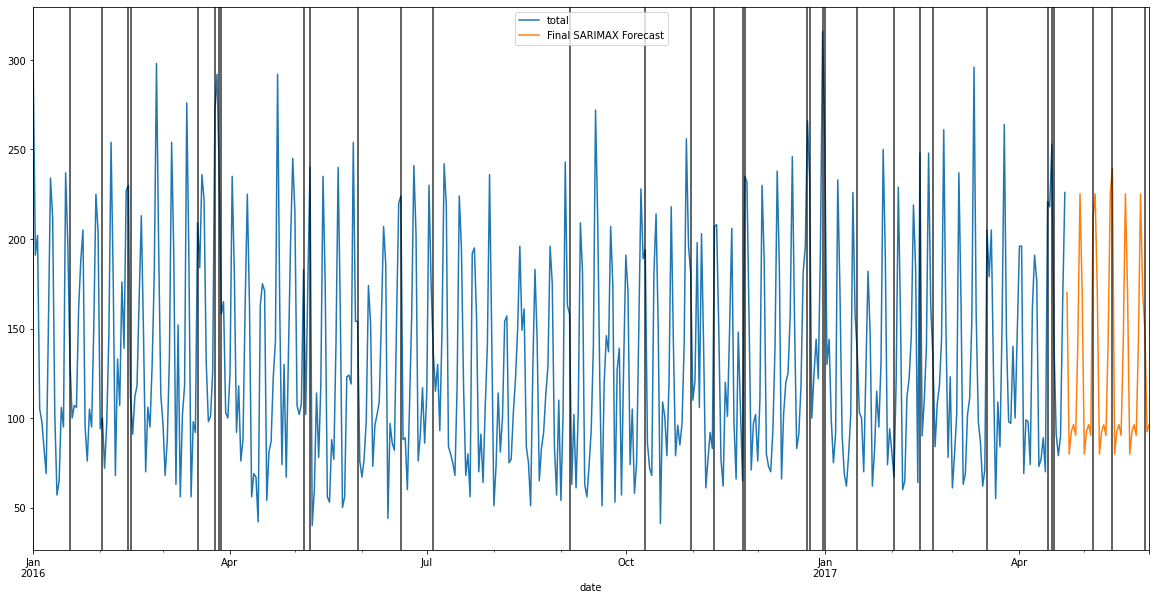

In [56]:
ax = df1['total'].plot(figsize=(20,10), legend=True)
fcast.plot(legend=True)

for day in df[df['holiday']==1].index: # Creates a vertical black line where there is a reported special holiday in the data plot
  ax.axvline(x=day, color='black',alpha=0.8);

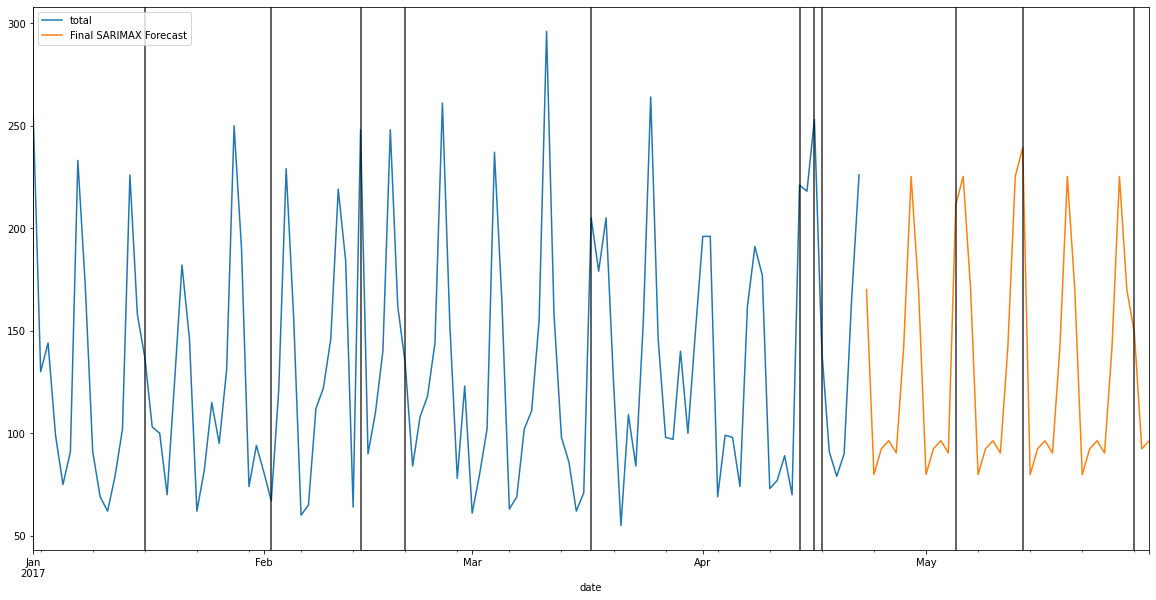

In [58]:
ax = df1['total'].loc['2017-01-01':].plot(figsize=(20,10), legend=True) # Displays the clear data about the future peak sales and whether there's any listed holiday.
fcast.plot(legend=True)

for day in df[df['holiday']==1].index: # Creates a vertical black line where there is a reported special holiday in the data plot
  ax.axvline(x=day, color='black',alpha=0.8);